### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Calcular el total facturado de cada una de las tiendas
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

#Almacenar datos de facturacion de cada tienda en una tabla
datos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Total Facturado': [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
}
datos_facturacion = pd.DataFrame(datos)
pd.set_option('display.float_format', '{:.2f}'.format)
print("Total facturado por tienda:")
display(datos_facturacion)


Total facturado por tienda:


,Tienda,Total Facturado
0,Tienda 1,1150880400.00
1,Tienda 2,1116343500.00
2,Tienda 3,1098019600.00
3,Tienda 4,1038375700.00


In [3]:
# Tienda con mayor facturación
tienda_mayor_facturacion = datos_facturacion.loc[datos_facturacion['Total Facturado'].idxmax()]
print("\nLa tienda con mayor facturación es:")
display(pd.DataFrame([tienda_mayor_facturacion]))

# Tienda con menor facturación
tienda_menor_facturacion = datos_facturacion.loc[datos_facturacion['Total Facturado'].idxmin()]
print("\nLa tienda con menor facturación es:")
display(pd.DataFrame([tienda_menor_facturacion]))


La tienda con mayor facturación es:


,Tienda,Total Facturado
0,Tienda 1,1150880400.00



La tienda con menor facturación es:


,Tienda,Total Facturado
3,Tienda 4,1038375700.00


# 2. Ventas por categoría

In [4]:
# Ventas por categoria en cada una de las tiendas
ventas_por_categoria_tienda1 = tienda.groupby('Categoría del Producto').size()
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size()
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size()
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size()

# Combinar los resultados en un solo DataFrame
ventas_por_categoria_todas_tiendas = pd.DataFrame({
    'Tienda 1': ventas_por_categoria_tienda1,
    'Tienda 2': ventas_por_categoria_tienda2,
    'Tienda 3': ventas_por_categoria_tienda3,
    'Tienda 4': ventas_por_categoria_tienda4
})

print("Ventas por categoría en cada tienda:")
display(ventas_por_categoria_todas_tiendas)

Ventas por categoría en cada tienda:


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [5]:
# Encontrar la categoría más popular (con mayor venta) para cada tienda
categoria_mas_popular_por_tienda = ventas_por_categoria_todas_tiendas.idxmax()

# Crear un DataFrame con la categoría más popular por tienda
tabla_categoria_mas_popular = pd.DataFrame(categoria_mas_popular_por_tienda, columns=['Categoría Más Popular'])

print("\nCategoría más popular por tienda:")
display(tabla_categoria_mas_popular)


Categoría más popular por tienda:


,Categoría Más Popular
Tienda 1,Muebles
Tienda 2,Muebles
Tienda 3,Muebles
Tienda 4,Muebles


# 3. Calificación promedio de la tienda


In [7]:
import numpy as np

# Calificacion promedio de cada una de las tiendas
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

#Promedios redondeados a 3 decimales para mas precisión
print("Calificación promedio de cada tienda por parte de los clientes:")
print("Tienda 1:", round(calificacion_promedio_tienda1,3))
print("Tienda 2:", round(calificacion_promedio_tienda2,3))
print("Tienda 3:", round(calificacion_promedio_tienda3,3))
print("Tienda 4:", round(calificacion_promedio_tienda4,3))

Calificación promedio de cada tienda por parte de los clientes:
Tienda 1: 3.977
Tienda 2: 4.037
Tienda 3: 4.048
Tienda 4: 3.996


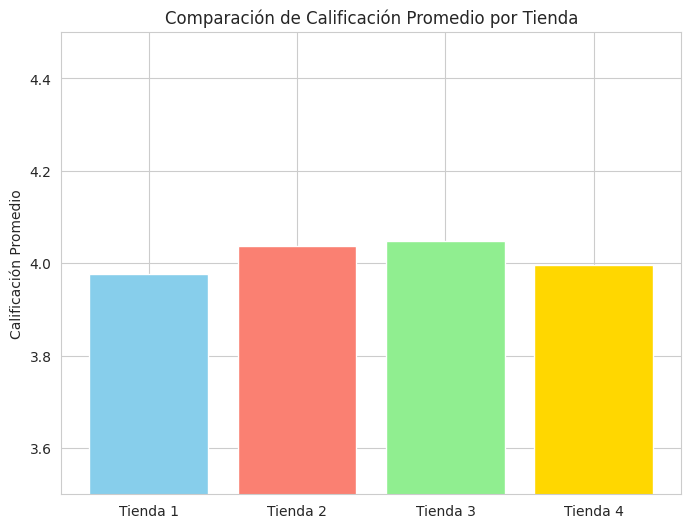

In [11]:
# Graficar la calificación promedio de cada tienda
calificaciones = {
    'Tienda 1': calificacion_promedio_tienda1,
    'Tienda 2': calificacion_promedio_tienda2,
    'Tienda 3': calificacion_promedio_tienda3,
    'Tienda 4': calificacion_promedio_tienda4
}

tiendas = list(calificaciones.keys())
promedios = list(calificaciones.values())

plt.figure(figsize=(8, 6))
plt.bar(tiendas, promedios, color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.ylabel('Calificación Promedio')
plt.title('Comparación de Calificación Promedio por Tienda')
plt.ylim(3.5, 4.5) # Ajustar el rango del eje y para mejor visualización
plt.show()

# 4. Productos más y menos vendidos

In [8]:
# Total de ventas por producto en cada tienda (basado en la cantidad de veces que se repite cada producto)
ventas_producto_tienda1 = tienda.groupby('Producto').size()
ventas_producto_tienda2 = tienda2.groupby('Producto').size()
ventas_producto_tienda3 = tienda3.groupby('Producto').size()
ventas_producto_tienda4 = tienda4.groupby('Producto').size()

# Encontrar los 5 productos más vendidos y los 5 menos vendidos para cada tienda
productos_mas_vendidos_tienda1 = ventas_producto_tienda1.nlargest(5)
productos_menos_vendidos_tienda1 = ventas_producto_tienda1.nsmallest(5)

productos_mas_vendidos_tienda2 = ventas_producto_tienda2.nlargest(5)
productos_menos_vendidos_tienda2 = ventas_producto_tienda2.nsmallest(5)

productos_mas_vendidos_tienda3 = ventas_producto_tienda3.nlargest(5)
productos_menos_vendidos_tienda3 = ventas_producto_tienda3.nsmallest(5)

productos_mas_vendidos_tienda4 = ventas_producto_tienda4.nlargest(5)
productos_menos_vendidos_tienda4 = ventas_producto_tienda4.nsmallest(5)

In [9]:
print("Productos más vendido en cada tienda:")
print("\nTienda 1:")
display(productos_mas_vendidos_tienda1.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 2:")
display(productos_mas_vendidos_tienda2.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 3:")
display(productos_mas_vendidos_tienda3.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 4:")
display(productos_mas_vendidos_tienda4.to_frame().T.rename(index={0: 'Cantidad'}))


print("\nProductos menos vendido en cada tienda:")
print("\nTienda 1:")
display(productos_menos_vendidos_tienda1.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 2:")
display(productos_menos_vendidos_tienda2.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 3:")
display(productos_menos_vendidos_tienda3.to_frame().T.rename(index={0: 'Cantidad'}))
print("\nTienda 4:")
display(productos_menos_vendidos_tienda4.to_frame().T.rename(index={0: 'Cantidad'}))

Productos más vendido en cada tienda:

Tienda 1:


Producto,Armario,Microondas,TV LED UHD 4K,Secadora de ropa,Bloques de construcción
Cantidad,60,60,60,58,56



Tienda 2:


Producto,Iniciando en programación,Microondas,Batería,Guitarra acústica,Pandereta
Cantidad,65,62,61,58,58



Tienda 3:


Producto,Kit de bancas,Cama king,Mesa de comedor,Mesa de noche,Set de ollas
Cantidad,57,56,56,55,55



Tienda 4:


Producto,Cama box,Cubertería,Cama king,Dashboards con Power BI,Carrito de control remoto
Cantidad,62,59,56,56,55



Productos menos vendido en cada tienda:

Tienda 1:


Producto,Auriculares con micrófono,Celular ABXY,Olla de presión,Pandereta,Ciencia de datos con Python
Cantidad,33,33,35,36,39



Tienda 2:


Producto,Juego de mesa,Impresora,Mesa de comedor,Sillón,Auriculares
Cantidad,32,34,34,35,37



Tienda 3:


Producto,Bloques de construcción,Microondas,Mochila,Set de vasos,Guitarra eléctrica
Cantidad,35,36,36,36,38



Tienda 4:


Producto,Guitarra eléctrica,Armario,Guitarra acústica,Ciencia de datos con Python,Lavadora de ropa
Cantidad,33,34,37,38,38


Gráficos de los 5 productos más vendidos por tienda:


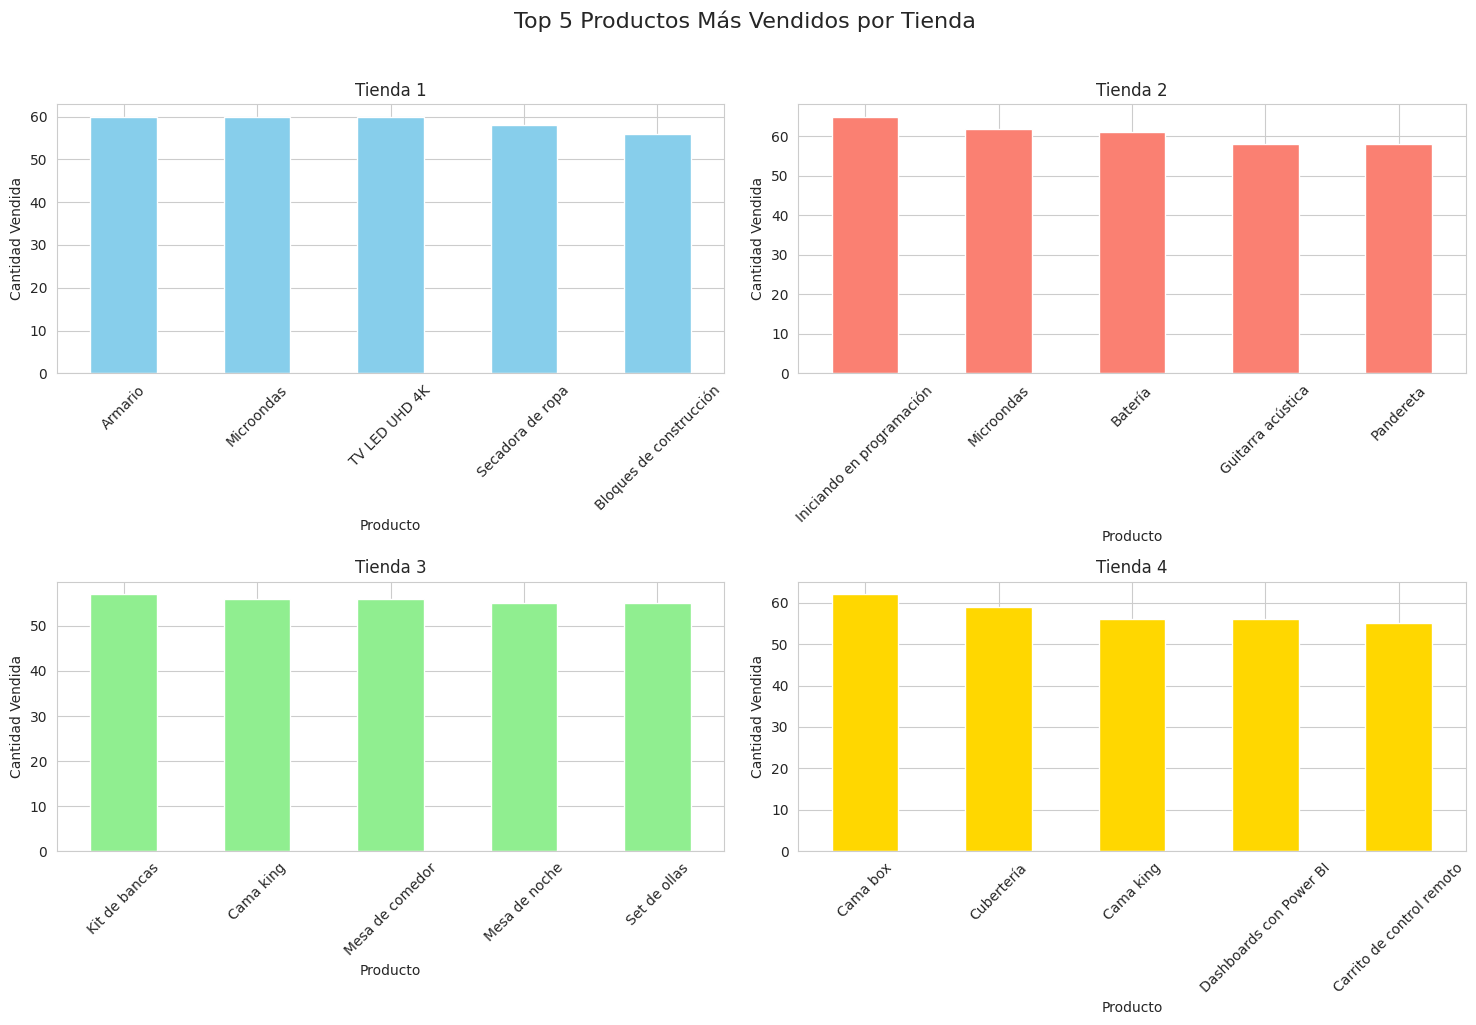


Gráficos de los 5 productos menos vendidos por tienda:


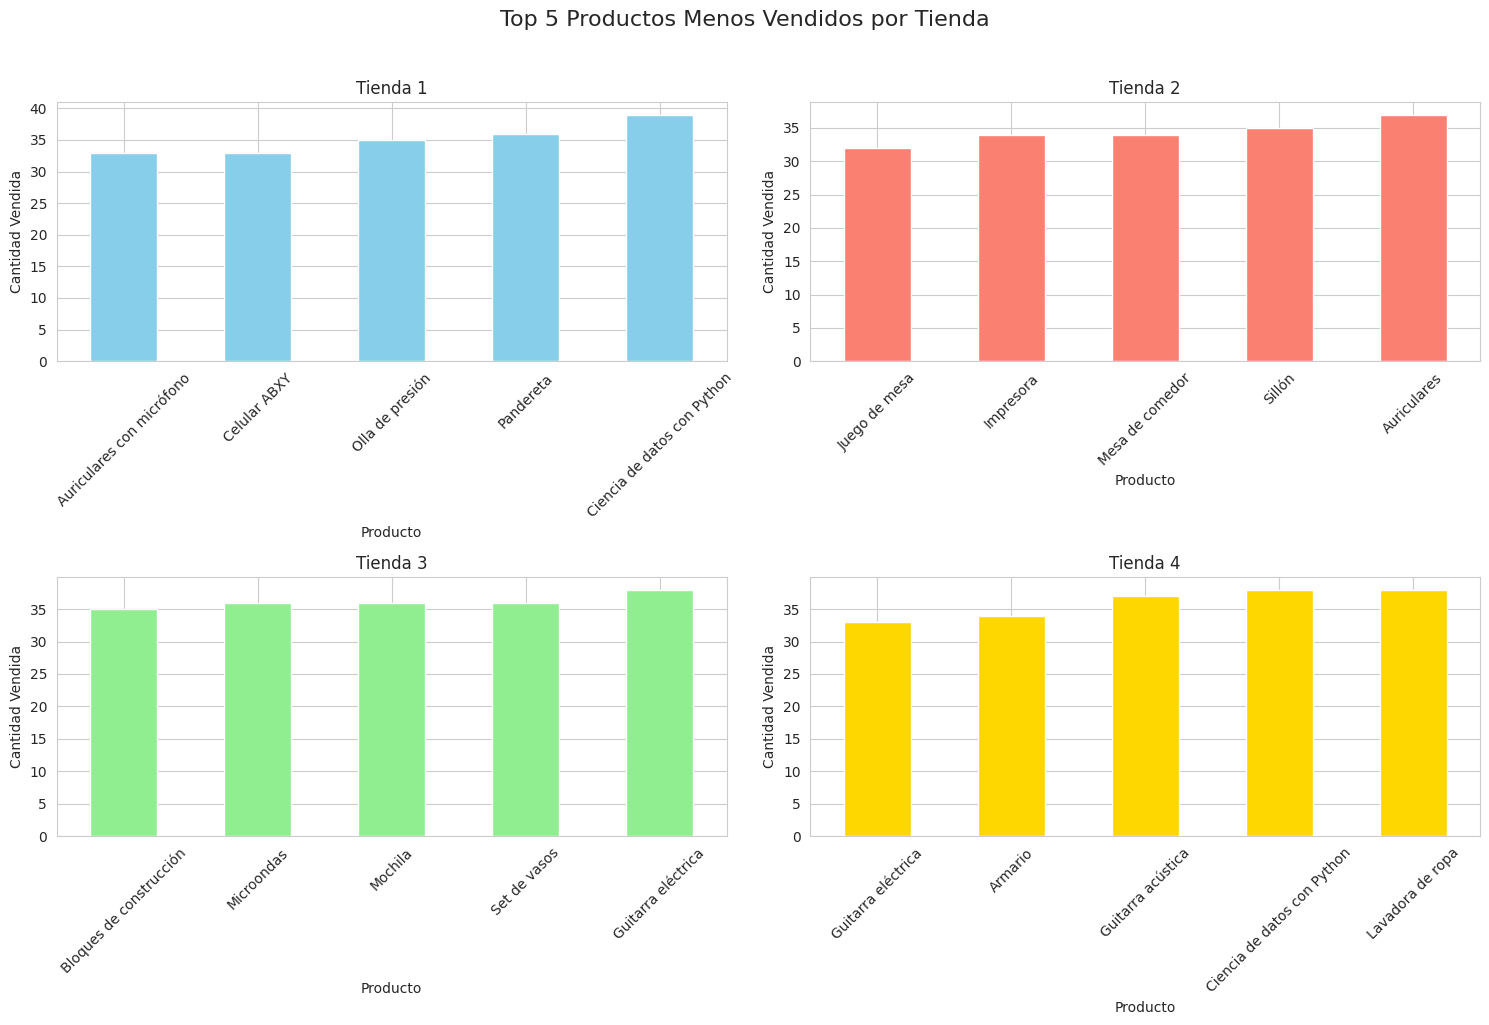

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Graficar productos más vendidos por tienda
print("Gráficos de los 5 productos más vendidos por tienda:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 5 Productos Más Vendidos por Tienda', y=1.02, fontsize=16)

productos_mas_vendidos_tienda1.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_ylabel('Cantidad Vendida')
axes[0, 0].tick_params(axis='x', rotation=45)

productos_mas_vendidos_tienda2.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_ylabel('Cantidad Vendida')
axes[0, 1].tick_params(axis='x', rotation=45)

productos_mas_vendidos_tienda3.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_ylabel('Cantidad Vendida')
axes[1, 0].tick_params(axis='x', rotation=45)

productos_mas_vendidos_tienda4.plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_ylabel('Cantidad Vendida')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Graficar productos menos vendidos por tienda
print("\nGráficos de los 5 productos menos vendidos por tienda:")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 5 Productos Menos Vendidos por Tienda', y=1.02, fontsize=16)

productos_menos_vendidos_tienda1.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_ylabel('Cantidad Vendida')
axes[0, 0].tick_params(axis='x', rotation=45)

productos_menos_vendidos_tienda2.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_ylabel('Cantidad Vendida')
axes[0, 1].tick_params(axis='x', rotation=45)

productos_menos_vendidos_tienda3.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_ylabel('Cantidad Vendida')
axes[1, 0].tick_params(axis='x', rotation=45)

productos_menos_vendidos_tienda4.plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_ylabel('Cantidad Vendida')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Promedio de costo de envio por cada tienda
promedio_envio_tienda1 = tienda['Costo de envío'].mean()
promedio_envio_tienda2 = tienda2['Costo de envío'].mean()
promedio_envio_tienda3 = tienda3['Costo de envío'].mean()
promedio_envio_tienda4 = tienda4['Costo de envío'].mean()

In [ ]:
#Promedios de costo de envio por cada tienda redondeados a 3 decimales
print("Costo promedio de envio por cada tienda")
print("Tienda 1:", round(promedio_envio_tienda1,3))
print("Tienda 2:", round(promedio_envio_tienda2,3))
print("Tienda 3:", round(promedio_envio_tienda3,3))
print("Tienda 4:", round(promedio_envio_tienda4,3))

Costo promedio de envio por cada tienda
Tienda 1: 26018.61
Tienda 2: 25216.236
Tienda 3: 24805.68
Tienda 4: 23459.457


## Informe de Análisis y Recomendación para la Venta de Tiendas


**Respetado Sr Juan**

El presente es con el fin de presentarle el informe que tiene como objetivo analizar el desempeño de las cuatro tiendas de su cadena, considerando diversos factores clave como ingresos totales, ventas por categoría de producto, calificaciones promedio de los clientes, productos más y menos vendidos, y costos de envío. El propósito de este análisis es proporcionar a usted ademas,  una recomendación fundamentada en datos sobre cuál de las tiendas debería considerar vender, basándose en una evaluación objetiva de sus fortalezas y debilidades.

Para llevar a cabo este análisis, se han analizado y estudiado los datos de ventas de cada una de las cuatro tiendas. A continuación, se presentan los hallazgos más relevantes:

**1. Ingresos Totales por Tienda:**

Se calculó el total facturado por cada tienda para entender su contribución económica general, los datos se muestran a continuación:

Total facturado por tienda:

Tienda 1: 1150880400.00

Tienda 2:	1116343500.00

Tienda 3: 1098019600.00

Tienda 4: 1038375700.00


Según la tabla, podemos observar que:
*   La **Tienda 1** presenta la mayor facturación total con $1150880400.00

*   La **Tienda 4** registra la menor facturación total con $1038375700.00


Esto indica que, en términos de ingresos brutos, la Tienda 1 es la más rentable, mientras que la Tienda 4 es la menos rentable.


**2. Ventas por Categoría de Producto:**

Analizamos la cantidad de productos vendidos por cada categoría en cada tienda. La tabla "Ventas por categoría en cada tienda" muestra el detalle de estas ventas. Un hallazgo importante es que la categoría "**Muebles**" es consistentemente la más vendida en todas las tiendas, como se evidencia en la tabla "Categoría más popular por tienda". Esto sugiere una fuerte demanda en esta categoría en general. La distribución de ventas por otras categorías es relativamente similar entre las tiendas, sin grandes diferencias que destaquen significativamente a alguna de ellas en términos de preferencia por una categoría específica (a excepción de la popularidad general de Muebles).

**3. Calificaciones Promedio de los Clientes:**

Se calculó la calificación promedio otorgada por los clientes a cada tienda. Los resultados son los siguientes:

* Tienda 1: 3.977

* Tienda 2: 4.037

* Tienda 3: 4.048

* Tienda 4: 3.996

Como se visualiza en el gráfico "Comparación de Calificación Promedio por Tienda", las calificaciones promedio son bastante similares entre las tiendas, fluctuando alrededor de 4.0. La **Tienda 3** tiene la calificación ligeramente más alta, mientras que la **Tienda 1** tiene la ligeramente más baja. Sin embargo, la diferencia es mínima y no representa una disparidad significativa en la percepción general de los clientes, teniendo en cuenta que la tienda 1 y la tienda 4, tienen las calificaciones promedios mas bajas, resulta favorable para la tienda 1 que tenga una mayor facturacion, por lo que puede existir mayor margen de mejora.


**4. Productos Más y Menos Vendidos:**

Se identificaron los 5 productos más vendidos y los 5 productos menos vendidos en cada tienda. Los gráficos "Top 5 Productos Más Vendidos por Tienda" y "Top 5 Productos Menos Vendidos por Tienda" ilustran estos hallazgos. Observamos que los productos específicos en los top 5 varían considerablemente entre las tiendas. Esto podría deberse a factores como la gestión de inventario, las promociones locales o las preferencias particulares de los clientes en cada ubicación. Es notable que algunos productos se repiten en los top más o menos vendidos en diferentes tiendas, lo que podría indicar tendencias a nivel de cadena o problemas específicos con ciertos productos.

**5. Costo de Envío Promedio:**

Se calculó el costo de envío promedio para cada tienda:

* Tienda 1: 26018.61

* Tienda 2: 25216.236

* Tienda 3: 24805.68

* Tienda 4: 23459.457

La **Tienda 1** tiene el costo de envío promedio más alto, mientras que la **Tienda 4** tiene el costo de envío promedio más bajo. Los costos de envío pueden influir en las decisiones de compra de los clientes y en la rentabilidad de cada venta.

**Conclusión y Recomendación**

Considerando el análisis integral de los datos, se presenta a continuación la recomendación sobre qué tienda debería considerar vender estimado sr Juan:

Basándonos principalmente en los **ingresos totales**, la **Tienda 4** es la que presenta el desempeño más bajo. Aunque tiene el costo de envío promedio más bajo y una calificación promedio competitiva, su menor facturación sugiere que, a pesar de estos factores, no logra generar el mismo volumen de negocio que las otras tiendas. Si el objetivo principal es optimizar la rentabilidad general de la cadena, la venta de la Tienda 4 liberaría recursos que podrían reinvertirse en las tiendas con mayor potencial de crecimiento o en otras áreas estratégicas.

Si bien la Tienda 1 tiene la calificación promedio ligeramente más baja y el costo de envío promedio más alto, su alta facturación indica una fuerte base de clientes y un volumen de ventas saludable que la posiciona como una tienda valiosa para la cadena. Las Tiendas 2 y 3 muestran un desempeño intermedio en la mayoría de los indicadores, sin debilidades significativas que justifiquen su venta por encima de la Tienda 4.

Por lo tanto, la recomendación es que considere **vender la Tienda 4**. Esta decisión se fundamenta en su menor contribución a los ingresos totales de la cadena, lo que la convierte en la opción con el menor impacto negativo en la facturación general tras la venta.

Es crucial que evalúe esta recomendación a la luz de otros factores estratégicos y operativos no cubiertos en este análisis, como el potencial de mercado local, los costos operativos específicos de cada tienda, el valor de los activos de cada ubicación y cualquier plan de expansión futuro. Sin embargo, desde una perspectiva puramente basada en los datos de ventas, calificacion y rentabilidad analizados, la Tienda 4 es la candidata más lógica para la venta.